# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np



/Users/danielraab/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [3]:
# frequency table for prestige and whether or not someone was admitted
f_tab=pd.crosstab(index=df['prestige'],columns=df["admit"])
f_tab

admit,0,1
prestige,,
1.0,28,33
2.0,95,53
3.0,93,28
4.0,55,12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [37]:
dummy_ranks=pd.get_dummies(df['prestige'],prefix='prestige')

dummy_ranks.head()
dummy_ranks.columns

Index([u'prestige_1.0', u'prestige_2.0', u'prestige_3.0', u'prestige_4.0'], dtype='object')

#### 2.2 When modeling our class variables, how many do we need? 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107187390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1073dfb50>]], dtype=object)

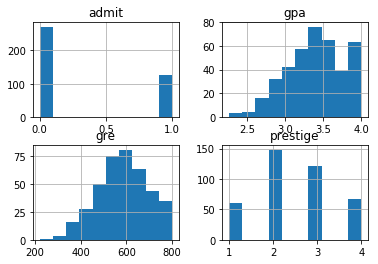

In [5]:
df.describe()
#df.std()
df.hist()

Answer: 

There are 3 X predictors for the 1 y column of admit. 
However we could also run various combinations to see if 
combined predictors work better than individual
The maximum combinations is therefore 3! = 3*2*1=6




## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [43]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_1':])
handCalc.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


In [7]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
p1_tab=pd.crosstab(index=handCalc['prestige_1.0'],columns=handCalc["admit"])
p1_tab

admit,0,1
prestige_1.0,,
0,243,93
1,28,33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [8]:
x=p1_tab.loc[1,1]
       
y=p1_tab.loc[1,0]
in_1_odds=float(x)/(float(x)+float(y))
in_1_odds


0.5409836065573771

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [9]:
x=p1_tab.loc[0,1]
       
y=p1_tab.loc[0,0]
not_1_odds=float(x)/(float(x)+float(y))
not_1_odds

0.2767857142857143

#### 3.3 Calculate the odds ratio

In [10]:
ratio=in_1_odds/not_1_odds
ratio

1.9545214172395557

#### 3.4 Write this finding in a sentenance: 

Answer: 

You have a 1.95 times greater chance of getting into 
grad school if you attended a top tier college 

#### 3.5 Print the cross tab for prestige_4

In [11]:
p4_tab=pd.crosstab(index=handCalc['prestige_4.0'],columns=handCalc["admit"])
p4_tab

admit,0,1
prestige_4.0,,
0,216,114
1,55,12


#### 3.6 Calculate the OR 

In [12]:
x4=p4_tab.loc[1,1]
y4=p4_tab.loc[1,0]
in_4_odds=float(x4)/(float(x4)+float(y4))
in_4_odds

xnot4=p4_tab.loc[0,1]
       
ynot4=p1_tab.loc[0,0]
not_4_odds=float(xnot4)/(float(xnot4)+float(ynot4))
not_4_odds

oddsRatio4=in_4_odds/not_4_odds
oddsRatio4


0.5608798114689709

#### 3.7 Write this finding in a sentence
Answer:
You have a only slighter more than 1/2 the chance to get into grad school if you attended a prestige level 4 school versus the other schools


Answer:

## Part 4. Analysis

In [13]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [14]:
# manually add the intercept
data['intercept'] = 1.0


#### 4.1 Set the covariates to a variable called train_cols

In [15]:
train_cols = data.columns[1:]
logreg=sm.Logit(data['admit'],data[train_cols])
train_cols

Index([u'gre', u'gpa', u'prestige_2.0', u'prestige_3.0', u'prestige_4.0',
       u'intercept'],
      dtype='object')

#### 4.2 Fit the model

In [16]:
result=logreg.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 Jan 2018   Pseudo R-squ.:                 0.08166
Time:                        07:19:31   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa              0.7793      0.333      2.344      0.019       0.128       1.431
prestige_2.0    -0.6801      0.317     -2.146      0.032      -1.301      -0.059
prestige_3.0    -1.3387      0.345     -3.882      0.000      -2.015      -0.663
prestige_4.0    -1.5534      0.417     -3.721      0.000      -2.372      -0.735
intercept       -3.8769      1.142     -3.393      0.001      -6.116      -1.638
================================================================================
"""

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [18]:
params=result.params
conf=result.conf_int()
conf['OR']=params
conf.columns = ['2.5%', '97.5%', 'OR']
#result.conf_int()
#np.exp(conf)
np.exp(conf)

,2.5%,97.5%,OR
gre,1.000074,1.004372,1.002221
gpa,1.136120,4.183113,2.180027
prestige_2.0,0.272168,0.942767,0.506548
prestige_3.0,0.133377,0.515419,0.262192
prestige_4.0,0.093329,0.479411,0.211525
intercept,0.002207,0.194440,0.020716


#### 4.5 Interpret the OR of Prestige_2

we can expect a 50% decrease in the admit odds if Prestige is 2 vs. 1


Answer: 

#### 4.6 Interpret the OR of GPA

Answer: 

a 1 point increase in GPA more than doubles your chance of admission


## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [160]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [161]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
print combos.head(100)

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]
             0         1    2    3
0   220.000000  2.260000  1.0  1.0
1   220.000000  2.260000  2.0  1.0
2   220.000000  2.260000  3.0  1.0
3   220.000000  2.260000  4.0  1.0
4   220.000000  2.453333  1.0  1.0
5   220.000000  2.453333  2.0  1.0
6   220.000000  2.453333  3.0  1.0
7   220.000000  2.453333  4.0  1.0
8   220.000000  2.646667  1.0  1.0
9   220.000000  2.646667  2.0  1.0
10  220.000000  2.646667  3.0  1.0
11  220.000000  2.646667  4.0  1.0
12  220.000000  2.840000  1.0  1.0
13  220.000000  2.840000  2.0  1.0
14  220.000000  2.840000  3.0  1.0
15  220.000000  2.840000  4.0  1.0
16  220.000000  3.033333  1.0  1.0
17  220.000000  3.033333  2.0  1.0
18  220.000000  3.033333  3.0  1.0
19  220.000000  3.033333  4.0  1.0

#### 5.1 Recreate the dummy variables

In [162]:
# recreate the dummy variables


combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']
# keep only what we need for making predictions

cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
combos


,gre,gpa,prestige,intercept,prestige_2,prestige_3,prestige_4
0,220.0,2.260000,1.0,1.0,0,0,0
1,220.0,2.260000,2.0,1.0,1,0,0
2,220.0,2.260000,3.0,1.0,0,1,0
3,220.0,2.260000,4.0,1.0,0,0,1
4,220.0,2.453333,1.0,1.0,0,0,0
5,220.0,2.453333,2.0,1.0,1,0,0
6,220.0,2.453333,3.0,1.0,0,1,0
7,220.0,2.453333,4.0,1.0,0,0,1
8,220.0,2.646667,1.0,1.0,0,0,0
9,220.0,2.646667,2.0,1.0,1,0,0


#### 5.2 Make predictions on the enumerated dataset

In [163]:
train_cols = combos.columns[1:]

combos['admit_pred'] = result.predict(combos[train_cols])

train_cols
print combos.tail()


       gre       gpa  prestige  intercept  prestige_2  prestige_3  prestige_4  \
395  800.0  3.806667       4.0        1.0           0           0           1   
396  800.0  4.000000       1.0        1.0           0           0           0   
397  800.0  4.000000       2.0        1.0           1           0           0   
398  800.0  4.000000       3.0        1.0           0           1           0   
399  800.0  4.000000       4.0        1.0           0           0           1   

     admit_pred  
395    0.192912  
396    0.526992  
397    0.389060  
398    0.528304  
399    0.192979  


#### 5.3 Interpret findings for the last 4 observations

In [ ]:
Answer: At high level of GRE, prestige less a factor for admissions

Answer: 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

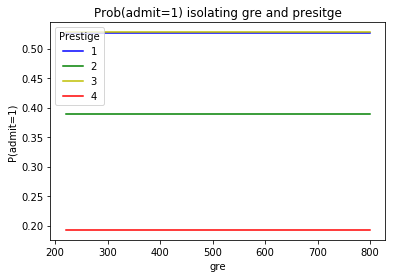

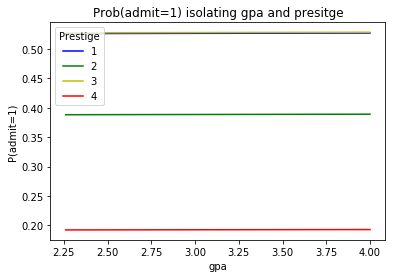

In [166]:

def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],aggfunc=np.mean)
    
    # in case you're curious as to what this looks like
    #print grouped
    #                      admit_pred
    # gre        prestige            
    # 220.000000 1           0.282462
    #            2           0.169987
    #            3           0.096544
    #            4           0.079859
    # 284.444444 1           0.311718
    
    # make a plot
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.loc[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')


